In [1]:
# Basic 

import os
import random
import re
import math
import time
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Scikit-learn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

# Deep Learning

from tqdm import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
# import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

# Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline

# Misc

# import streamlit as st
from PIL import Image
# import cufflinks
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

In [86]:
# import pandas as pd
# import numpy as np 
# import matplotlib.pyplot as plt
# import os
# from urllib.request import urlopen,urlretrieve
# from PIL import Image
# from tqdm import tqdm_notebook
# %matplotlib inline
# from sklearn.utils import shuffle
# import cv2
# from resnets_utils import *

# from keras.models import load_model
# from sklearn.datasets import load_files   
# from keras.utils import np_utils
# from glob import glob
# from keras import applications
# from keras.preprocessing.image import ImageDataGenerator
# # from keras.preprocessing.image import image_dataset_from_directory
# from keras import optimizers
# from keras.models import Sequential,Model,load_model
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
# from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [87]:
# import tensorflow as tf
# from tensorflow import keras

# # print("No. of GPUs: ", len(tf.config.list_physical_devices('GPU') ))
# print("No. of GPUs: ", len(tf.config.experimental.list_physical_devices('GPU') ))

No. of GPUs:  1


In [88]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices()) # list of DeviceAttributes

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1779202038011615795
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3151455847
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16151266270702587333
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import pathlib
# Setting file paths for our notebook:

data_dir = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_6000'
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

12856


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
# Training Data


train_dir = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12856 files belonging to 2 classes.
Using 10285 files for training.


In [6]:
# Testing Data

validation_dir = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12856 files belonging to 2 classes.
Using 2571 files for validation.


In [7]:
class_names = train_dir.class_names
print(class_names)

['benign', 'malignant']


In [8]:
for image_batch, labels_batch in train_dir:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dir = train_dir.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dir = validation_dir.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
normalized_ds = train_dir.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.11437833 0.76470596


In [12]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [16]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [19]:
resnet_history = base_model.fit(train_dir, validation_data = validation_dir, epochs = 10)

Epoch 1/10
322/322 [==============================] - 387s 1s/step - loss: 0.2631 - acc: 0.9329 - val_loss: 0.3339 - val_acc: 0.9020
Epoch 2/10
322/322 [==============================] - 420s 1s/step - loss: 0.1436 - acc: 0.9607 - val_loss: 0.3158 - val_acc: 0.9109
Epoch 3/10
322/322 [==============================] - 396s 1s/step - loss: 0.0779 - acc: 0.9798 - val_loss: 0.3035 - val_acc: 0.9164
Epoch 4/10
322/322 [==============================] - 395s 1s/step - loss: 0.0455 - acc: 0.9915 - val_loss: 0.2999 - val_acc: 0.9226
Epoch 5/10
322/322 [==============================] - 426s 1s/step - loss: 0.0291 - acc: 0.9960 - val_loss: 0.2972 - val_acc: 0.9230
Epoch 6/10
322/322 [==============================] - 417s 1s/step - loss: 0.0204 - acc: 0.9982 - val_loss: 0.2992 - val_acc: 0.9203
Epoch 7/10
322/322 [==============================] - 396s 1s/step - loss: 0.0155 - acc: 0.9992 - val_loss: 0.3000 - val_acc: 0.9238
Epoch 8/10
322/322 [==============================] - 430s 1s/step - 

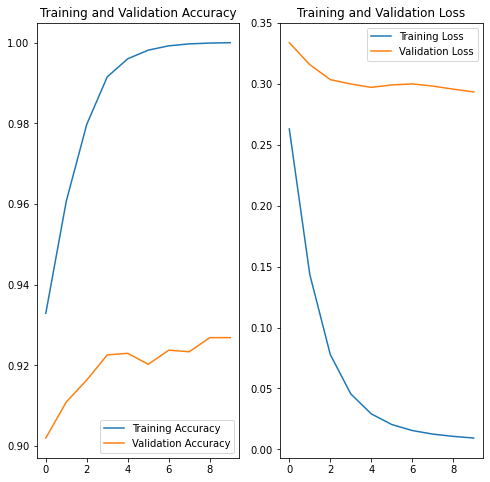

In [22]:
epochs = 10

acc = resnet_history.history['acc']
val_acc = resnet_history.history['val_acc']

loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
tf.keras.models.save_model(base_model, 'resnet50_1.hdf5')

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model = tf.keras.models.load_model('resnet50_weights_tf_dim_ordering_tf_kernels.h5')

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# epochs = 10
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# test_image_url = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test\ISIC_0112420.jpg'
test_image_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train_class\malignant\ISIC_4523382.jpg'

img = keras.preprocessing.image.load_img(
    test_image_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
tf.keras.models.save_model(model, 'my_model_6000.hdf5')

In [ ]:
%%writefile app1.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('my_model_6000.hdf5')
    return model
model = load_model()
st.write("""
        # Melanoma Classification
""")

file = st.file_uploader("Please upload image file", type=["jpg", "png"])
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    size = (180, 180)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    
    return prediction

if file is None:
    st.text("Please upload image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    class_names = ['Benign', 'Malignant']
    string = "This image most likely belongs to {} with a {:.2f}% confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
    st.success(string)

In [ ]:
!ngrok authtoken 1lJlGZQQXEgbwYLo0nblXjSPAls_4bm4H7Xc2LAQuPvwyhAbR

In [ ]:
!streamlit run app1.py 

In [ ]:
# from pyngrok import ngrok
# url = ngrok.connect(port=8501)
# url